In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import utils

In [18]:
df = utils.DBtable_to_df('../integration.duckdb','integratedTable')

# Understanding our data

In [19]:
df.head()

,Madrid_section,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,...,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors,Year,Extrangeros
0,79601001,67,88,62,16,9,4,101,69,15,...,35,11,4,2,13,17,0,1,2019,194
1,79601002,99,89,36,15,5,3,84,29,11,...,41,11,1,0,13,12,0,0,2019,234
2,79601003,147,151,71,42,7,1,144,75,23,...,54,16,5,1,20,35,0,2,2019,480
3,79601004,99,95,55,20,9,1,88,71,23,...,43,14,1,0,15,17,1,0,2019,191
4,79601006,142,174,75,42,12,1,151,80,33,...,61,13,3,1,12,22,0,0,2019,306


In [20]:
df.iloc[:,1:].describe() # we skip Madrid section

,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,two_adults_and_two_minors,...,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors,Year,Extrangeros
count,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,...,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000
mean,48.079274,47.395279,51.515077,15.039023,11.033292,2.224997,65.191431,71.452313,29.175194,26.760267,...,42.690408,21.030973,3.266885,1.410288,19.294992,22.343567,0.230181,0.159503,2019.000000,190.851822
std,31.489794,33.013755,21.728245,6.664517,9.535413,2.934836,33.039019,29.016332,22.894930,29.624943,...,13.907458,14.642678,2.594501,1.605347,7.676172,12.737230,0.644794,0.427069,0.816552,130.517629
min,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,...,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2018.000000,4.000000
25%,25.000000,26.000000,38.000000,10.000000,6.000000,1.000000,42.000000,51.000000,17.000000,13.000000,...,32.000000,12.000000,1.000000,0.000000,14.000000,13.000000,0.000000,0.000000,2018.000000,100.000000
50%,40.000000,39.000000,50.000000,14.000000,9.000000,1.000000,59.000000,68.000000,23.000000,18.000000,...,41.000000,17.000000,3.000000,1.000000,18.000000,19.000000,0.000000,0.000000,2019.000000,158.000000
75%,63.000000,59.000000,65.000000,19.000000,13.000000,3.000000,81.000000,88.000000,32.000000,26.000000,...,51.000000,25.000000,5.000000,2.000000,24.000000,28.000000,0.000000,0.000000,2020.000000,250.000000
max,237.000000,310.000000,154.000000,47.000000,133.000000,31.000000,305.000000,196.000000,306.000000,300.000000,...,105.000000,119.000000,29.000000,21.000000,56.000000,108.000000,9.000000,6.000000,2020.000000,1204.000000


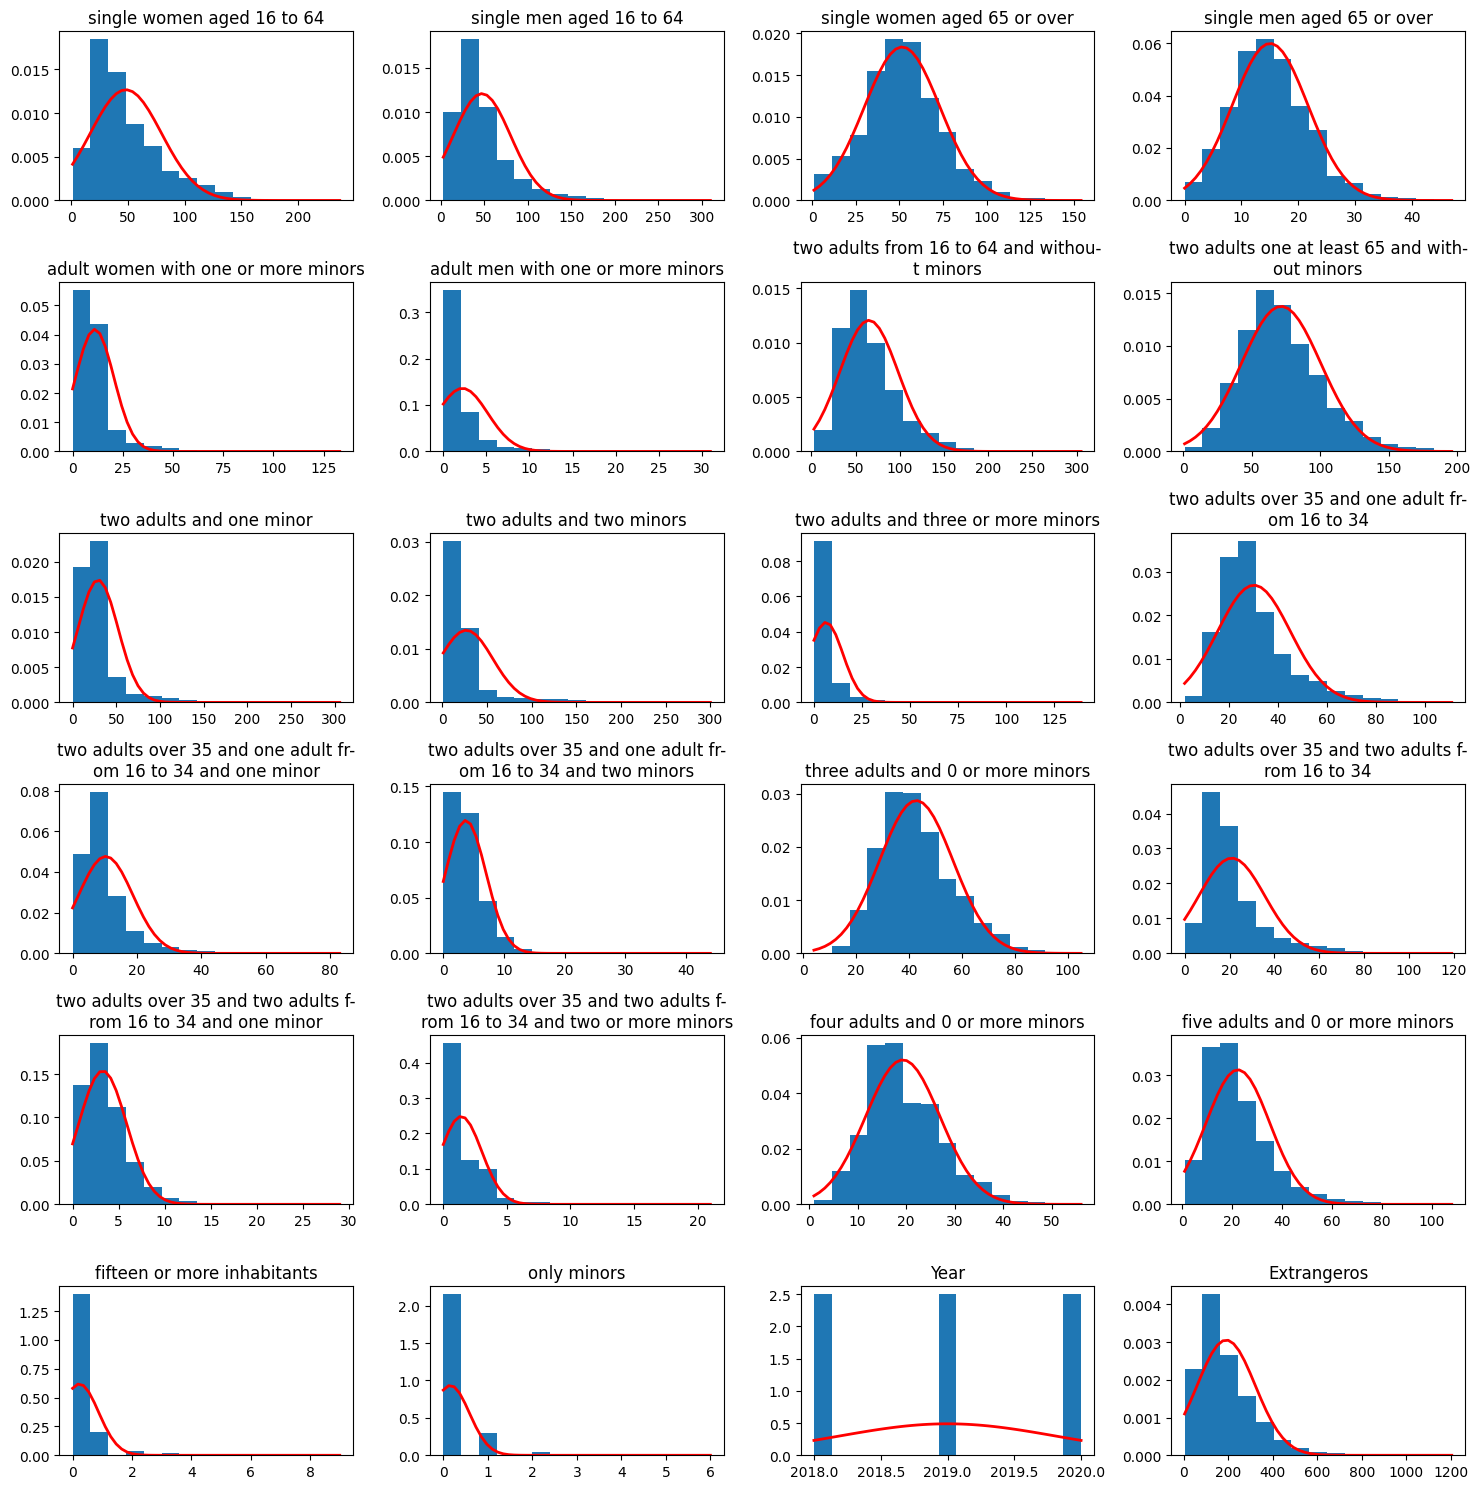

In [21]:
def gaussianity_plot(df):    
    fig, axes = plt.subplots(6, 4, figsize=(15, 15))

    # We skip madrid section
    for i, c in enumerate(df.columns[1:]):
        ax = axes.reshape(-1)[i]

        count, bins, ignore = ax.hist(df[c], 15, density=True)
        sigma = df[c].std()
        mu = df[c].mean()
        dbins = np.linspace(bins[0], bins[-1])
        ax.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (dbins - mu)**2
                                                            / (2 * sigma**2)), linewidth=2, color='red')
        c = c.replace('_', ' ')
        title = f'{c[:35]}-\n{c[35:]}' if len(c) > 35 else c
        t = ax.set_title(title)

    plt.tight_layout()

gaussianity_plot(df)

Almost all the varaibles are positive skewed, and one of these is our target varaible, therefore we know that maybe our results in modeling will not be the best, since it does not follow the normal distribution.

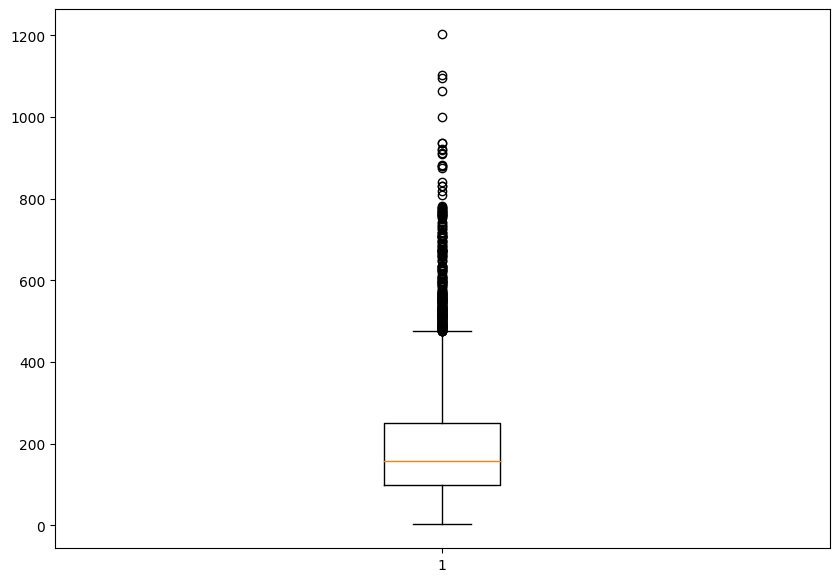

In [22]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Extrangeros'])
plt.show()

As we already expected from the previous graph, the target it has a lot of outliers that we will have to deal when training. The worst thing is that this data is not wrong, and we can't eliminate sections nor impute the results, since we want to deal with real values.

# Preview of splitted data

In [23]:
X_train, X_test, y_train, y_test = utils.load_data('../1.Feature generation')

In [24]:
X_train.describe()

,Madrid_section,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,...,two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors,Year
count,5.130000e+03,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,...,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000
mean,7.961046e+07,48.022612,47.352632,51.470370,15.000000,10.942300,2.221248,65.038986,71.389669,29.092203,...,3.665302,42.623977,20.790448,3.241715,1.384600,19.276803,22.421442,0.225731,0.155945,2018.997661
std,5.420942e+03,31.397083,32.923856,21.490756,6.606271,9.228147,2.929332,32.835411,29.002625,22.975448,...,3.137467,13.878295,14.327409,2.523598,1.539636,7.651950,12.578541,0.645123,0.421040,0.816573
min,7.960100e+07,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2018.000000
25%,7.960608e+07,25.000000,26.000000,38.000000,11.000000,6.000000,1.000000,42.000000,51.000000,17.000000,...,2.000000,32.000000,12.000000,1.000000,0.000000,14.000000,13.000000,0.000000,0.000000,2018.000000
50%,7.961018e+07,39.000000,38.000000,50.000000,14.000000,9.000000,1.000000,58.000000,68.000000,23.000000,...,3.000000,41.000000,17.000000,3.000000,1.000000,18.000000,19.000000,0.000000,0.000000,2019.000000
75%,7.961505e+07,63.000000,59.000000,65.000000,19.000000,13.000000,3.000000,81.000000,89.000000,32.000000,...,5.000000,51.000000,24.000000,5.000000,2.000000,24.000000,28.000000,0.000000,0.000000,2020.000000
max,7.962103e+07,224.000000,310.000000,153.000000,45.000000,86.000000,31.000000,300.000000,189.000000,306.000000,...,34.000000,105.000000,119.000000,29.000000,13.000000,56.000000,98.000000,9.000000,4.000000,2020.000000


In [25]:
X_test.describe()

,Madrid_section,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,...,two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors,Year
count,2.199000e+03,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,...,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,7.961040e+07,48.211460,47.494770,51.619372,15.130059,11.245566,2.233743,65.547067,71.598454,29.368804,...,3.787631,42.845384,21.592087,3.325603,1.470214,19.337426,22.161892,0.240564,0.167804,2019.005457
std,5.399476e+03,31.711798,33.229834,22.277046,6.799106,10.215410,2.948285,33.514035,29.054359,22.710004,...,3.761051,13.977192,15.341711,2.752521,1.747974,7.733965,13.101069,0.644054,0.440799,0.816664
min,7.960100e+07,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,...,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2018.000000
25%,7.960606e+07,25.000000,26.000000,38.000000,10.000000,6.000000,1.000000,42.000000,51.000000,17.000000,...,2.000000,33.000000,12.000000,1.000000,0.000000,14.000000,13.000000,0.000000,0.000000,2018.000000
50%,7.961019e+07,40.000000,39.000000,50.000000,14.000000,9.000000,1.000000,60.000000,68.000000,23.000000,...,3.000000,41.000000,17.000000,3.000000,1.000000,18.000000,19.000000,0.000000,0.000000,2019.000000
75%,7.961503e+07,64.000000,59.000000,66.000000,19.000000,13.000000,3.000000,82.000000,87.000000,32.000000,...,5.000000,51.000000,26.000000,5.000000,2.000000,24.000000,27.000000,0.000000,0.000000,2020.000000
max,7.962103e+07,237.000000,288.000000,154.000000,47.000000,133.000000,26.000000,305.000000,196.000000,208.000000,...,44.000000,102.000000,111.000000,26.000000,21.000000,52.000000,108.000000,7.000000,6.000000,2020.000000


In [26]:
y_train.describe()

count    5130.000000
mean      191.751267
std       129.545085
min         4.000000
25%       101.000000
50%       159.000000
75%       251.000000
max      1063.000000
Name: Extrangeros, dtype: float64

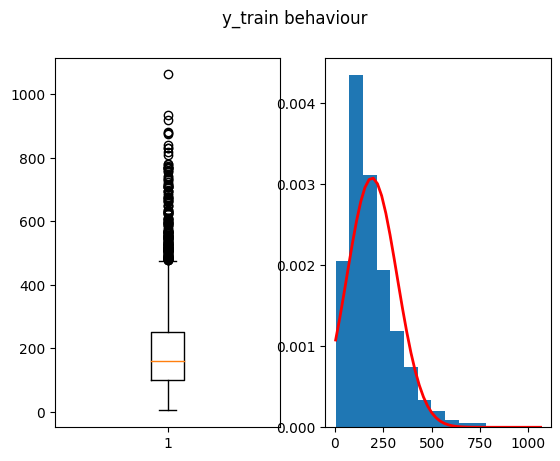

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('y_train behaviour')
ax1.boxplot(y_train)
count, bins, ignore = ax2.hist(y_train, 15, density=True)
sigma = y_train.std()
mu = y_train.mean()
dbins = np.linspace(bins[0], bins[-1])
ax2.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (dbins - mu)**2
                                                            / (2 * sigma**2)), linewidth=2, color='red')
plt.show()

In [28]:
y_test.describe()

count    2199.000000
mean      188.753524
std       132.764825
min         4.000000
25%        98.000000
50%       157.000000
75%       244.500000
max      1204.000000
Name: Extrangeros, dtype: float64

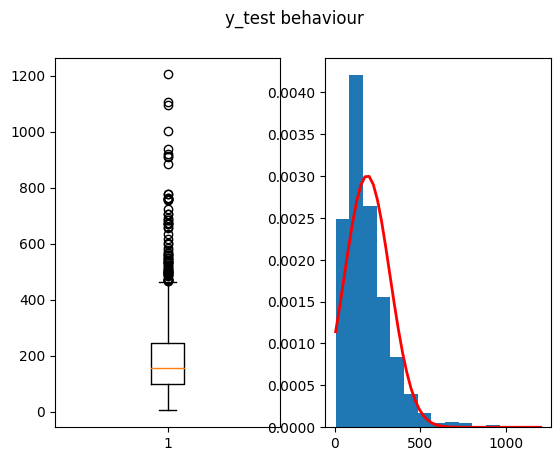

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('y_test behaviour')
ax1.boxplot(y_test)
count, bins, ignore = ax2.hist(y_test, 15, density=True)
sigma = y_test.std()
mu = y_test.mean()
dbins = np.linspace(bins[0], bins[-1])
ax2.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (dbins - mu)**2
                                                            / (2 * sigma**2)), linewidth=2, color='red')
plt.show()

The target varaible in training and test have a similar behaviour, therefore the splitting has not been done wrong